<a href="https://colab.research.google.com/github/remi3333/DSPR_Research_Wildlife/blob/main/WildlifeResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
url = '/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250721 (1).csv'
squirrel_df = pd.read_csv(url)
squirrel_df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [50]:
#Exploring data
squirrel_df.info()

'''
columns with MANY  null values:
Color Notes 182 non-null, Specific Location 476 non-null,
Other activities 437 non null, Other Interactions 437 non-null,

columns with few null values:
Age 2902 non-null, Primary Fur Color 2968 non-null, Highlight Fur Color 1937 non-null,
Location 2959 non-null, Above Ground Sighter Measurement 2909 non-null

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

'\ncolumns with MANY  null values:\nColor Notes 182 non-null, Specific Location 476 non-null,\nOther activities 437 non null, Other Interactions 437 non-null,\n\ncolumns with few null values:\nAge 2902 non-null, Primary Fur Color 2968 non-null, Highlight Fur Color 1937 non-null,\nLocation 2959 non-null, Above Ground Sighter Measurement 2909 non-null\n\n'

In [51]:
squirrel_df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [52]:
#Dropping columns with exessive null values to clean the data
squirrel_df = squirrel_df.drop(columns=['Color notes', 'Specific Location', 'Other Activities', 'Other Interactions'])
squirrel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [53]:
#EXPLORING COLUMNS WITH MOST DATA NON-NULL
squirrel_df['Age'].value_counts()

,count
Age,
Adult,2568
Juvenile,330
?,4


In [54]:
squirrel_df['Highlight Fur Color'].value_counts()

,count
Highlight Fur Color,
Cinnamon,767
White,585
"Cinnamon, White",268
Gray,170
"Gray, White",59
Black,34
"Black, Cinnamon, White",32
"Black, White",10
"Black, Cinnamon",9


In [55]:
squirrel_df['Primary Fur Color'].value_counts()

,count
Primary Fur Color,
Gray,2473
Cinnamon,392
Black,103


In [56]:
squirrel_df['Above Ground Sighter Measurement'].unique()

array([nan, '10', 'FALSE', '30', '6', '24', '8', '25', '5', '50', '4',
       '3', '70', '12', '2', '20', '7', '13', '15', '28', '35', '100',
       '1', '80', '65', '40', '18', '17', '55', '60', '180', '9', '45',
       '0', '43', '16', '33', '11', '23', '31', '14', '19'], dtype=object)

In [57]:
squirrel_df['Location'].value_counts()

,count
Location,
Ground Plane,2116
Above Ground,843


In [58]:
squirrel_df['Age'] = squirrel_df['Age'].fillna(value ='Unknown')
squirrel_df['Highlight Fur Color'] = squirrel_df['Highlight Fur Color'].fillna(value ='Unknown')
squirrel_df['Primary Fur Color'] = squirrel_df['Primary Fur Color'].fillna(value ='Unknown')
squirrel_df['Above Ground Sighter Measurement'] = squirrel_df['Above Ground Sighter Measurement'].fillna(value ='Unknown')
squirrel_df['Location'] = squirrel_df['Location'].fillna(value ='Unknown')
squirrel_df

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,Unknown,Unknown,Unknown,...,False,False,False,False,False,False,False,False,False,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,Unknown,Unknown,Unknown,...,False,False,False,False,False,False,False,False,False,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,Unknown,Gray,Unknown,...,False,False,False,False,False,False,False,False,False,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,Unknown,...,True,False,False,False,False,False,False,False,True,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,True,False,False,False,False,False,False,False,False,POINT (-73.9702676472613 40.7762126854894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,Unknown,...,True,False,False,False,False,False,False,False,True,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,True,False,False,False,False,False,False,True,False,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,True,False,False,False,False,False,False,True,False,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,Unknown,Gray,"Cinnamon, White",...,False,False,False,False,False,False,False,True,False,POINT (-73.9639941227864 40.7899152327912)


In [59]:
squirrel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         3023 non-null   object 
 8   Primary Fur Color                           3023 non-null   object 
 9   Highlight Fur Color                         3023 non-null   object 
 10  Combination 

In [60]:
renaming = {'Tail flags':'Tail Flags', 'Tail twitches': 'Tail Twitches'}
squirrel_df = squirrel_df.rename(columns = renaming)
squirrel_df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Location', 'Above Ground Sighter Measurement', 'Running', 'Chasing',
       'Climbing', 'Eating', 'Foraging', 'Kuks', 'Quaas', 'Moans',
       'Tail Flags', 'Tail Twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Lat/Long'],
      dtype='object')

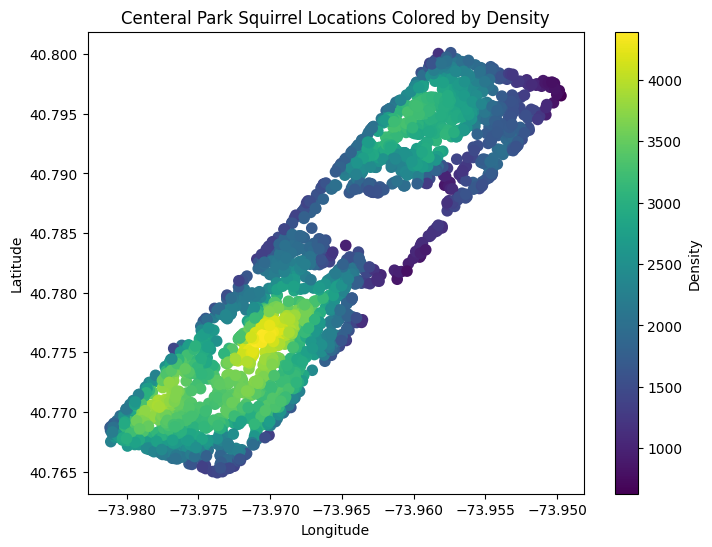

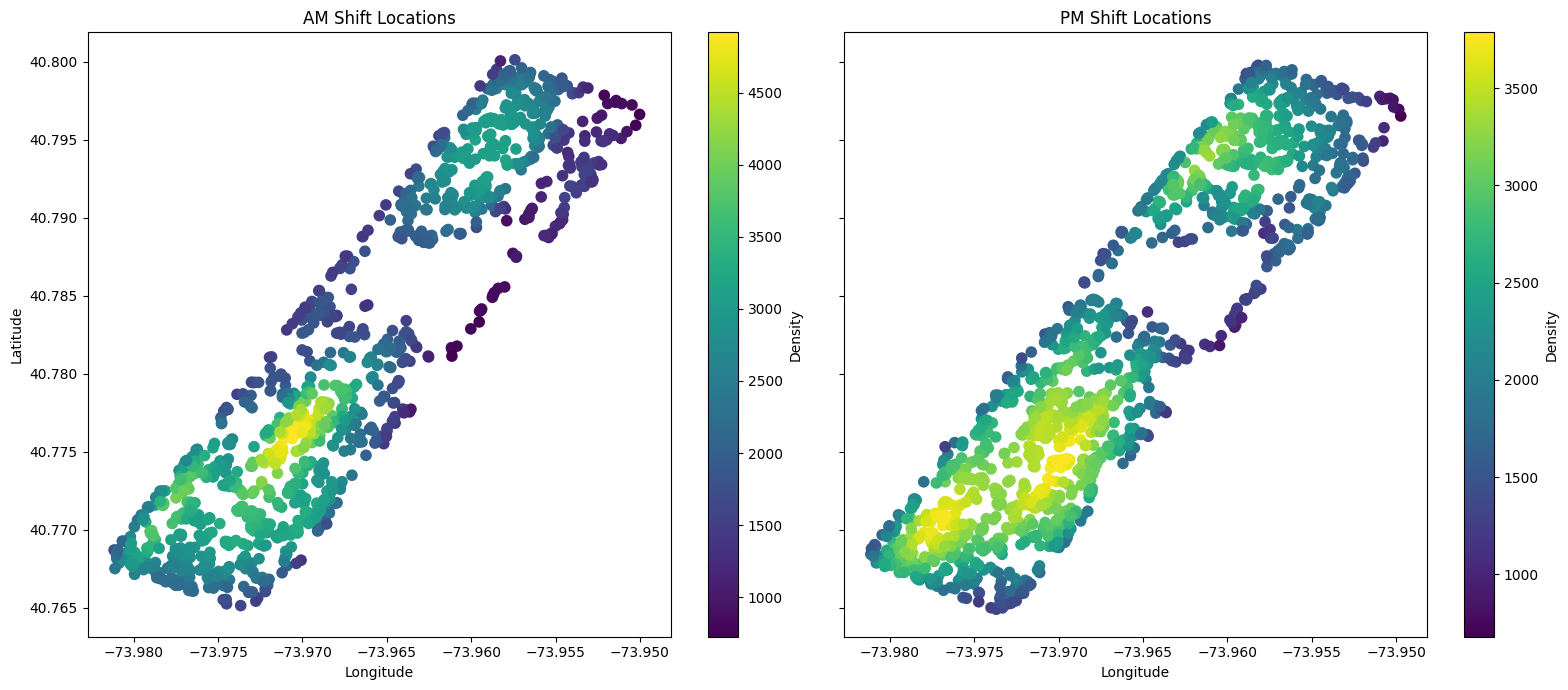

In [61]:
#IMPORTANT: code found on stack overflow and modified

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
xy = np.vstack([squirrel_df['X'], squirrel_df['Y']])
z = gaussian_kde(xy)(xy)

#for all at once
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(squirrel_df['X'], squirrel_df['Y'], c=z, cmap='viridis', s=70, edgecolor='none')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Density')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Centeral Park Squirrel Locations Colored by Density')

plt.show()


#for only AM versus PM
am_df = squirrel_df[squirrel_df['Shift'] == 'AM']
pm_df = squirrel_df[squirrel_df['Shift'] == 'PM']

# Create a figure with two subplots side-by-side
fig, (ax_am, ax_pm) = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

#Plot for AM Shift
if not am_df.empty:
    xy_am = np.vstack([am_df['X'], am_df['Y']])
    z_am = gaussian_kde(xy_am)(xy_am)
    scatter_am = ax_am.scatter(am_df['X'], am_df['Y'], c=z_am, cmap='viridis', s=70, edgecolor='none')
    cbar_am = fig.colorbar(scatter_am, ax=ax_am)
    cbar_am.set_label('Density')
    ax_am.set_title('AM Shift Locations')
else:
    ax_am.set_title('No Data for AM Shift')
ax_am.set_xlabel('Longitude')
ax_am.set_ylabel('Latitude')


#Plot for PM Shift
if not pm_df.empty:
    xy_pm = np.vstack([pm_df['X'], pm_df['Y']])
    z_pm = gaussian_kde(xy_pm)(xy_pm)
    scatter_pm = ax_pm.scatter(pm_df['X'], pm_df['Y'], c=z_pm, cmap='viridis', s=70, edgecolor='none')
    cbar_pm = fig.colorbar(scatter_pm, ax=ax_pm)
    cbar_pm.set_label('Density')
    ax_pm.set_title('PM Shift Locations')
else:
    ax_pm.set_title('No Data for PM Shift')
ax_pm.set_xlabel('Longitude')


plt.tight_layout() # This adjusts subplot params for tight layout
plt.show()

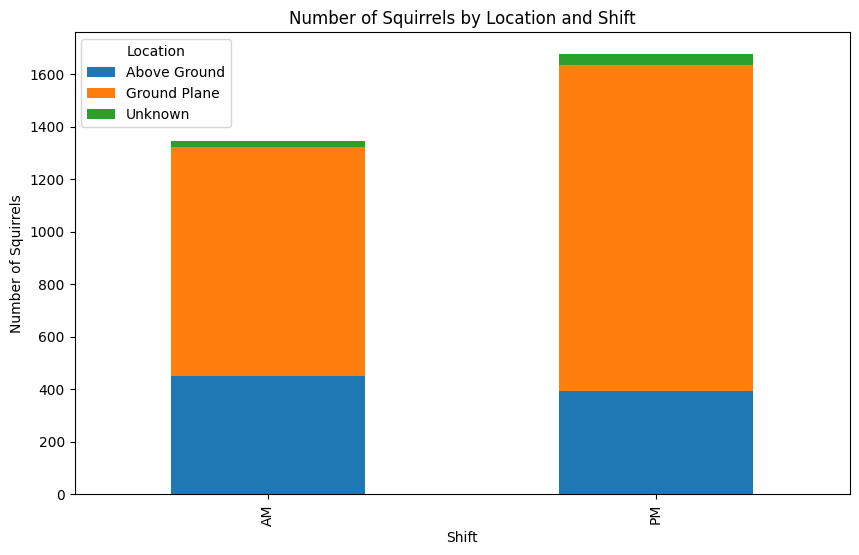

In [62]:
#Based on time where were the squirrels located
location_by_time = squirrel_df.groupby('Shift')['Location'].value_counts().unstack().fillna(0)
location_by_time.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Shift')
plt.ylabel('Number of Squirrels')
plt.title('Number of Squirrels by Location and Shift')
plt.legend(title='Location')
plt.show()

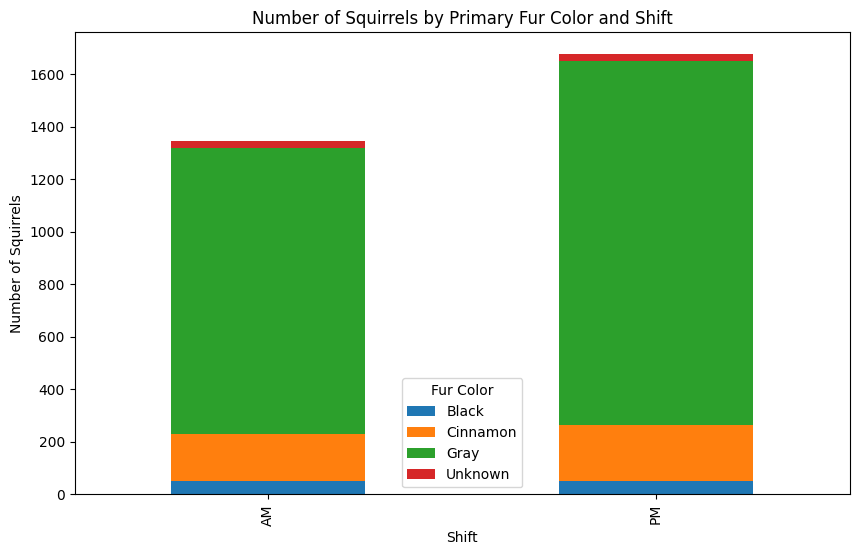

In [63]:
#Based on time which "spieces"/ fur type was active
furtype_by_time = squirrel_df.groupby('Shift')['Primary Fur Color'].value_counts().unstack().fillna(0)
furtype_by_time.plot(kind= 'bar', stacked=True, figsize=(10, 6))
plt.xlabel('Shift')
plt.ylabel('Number of Squirrels')
plt.title('Number of Squirrels by Primary Fur Color and Shift')
plt.legend(title='Fur Color')
plt.show()

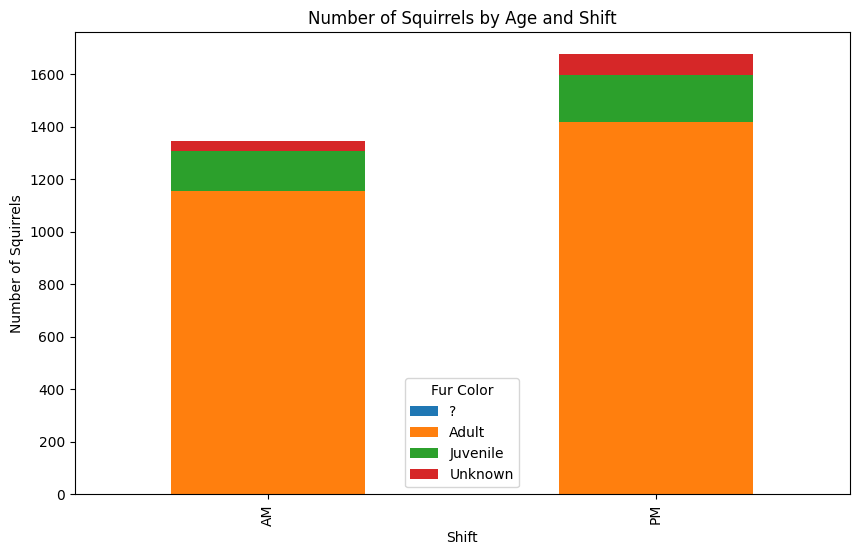

In [64]:
#Based on time what was the average Age was active
furtype_by_time = squirrel_df.groupby('Shift')['Age'].value_counts().unstack().fillna(0)
furtype_by_time.plot(kind= 'bar', stacked=True, figsize=(10, 6))
plt.xlabel('Shift')
plt.ylabel('Number of Squirrels')
plt.title('Number of Squirrels by Age and Shift')
plt.legend(title='Fur Color')
plt.show()

In [65]:
#Analyzing squirrel activity in the AM versus PM using t-test
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

In [66]:
'''
Null Hypothesis: There is no statistically significant difference in the running activity between the AM and PM shifts in the NYC squirrel population.
Alternative Hypothesis: Theres is a statistically significant difference in the running activity bteween the AM and PM SHifts in the NYC squirrel population.
'''
# Filter the 'Running' column based on the 'Shift' column
group_1 = squirrel_df[squirrel_df['Shift'] == 'AM']['Running']
group_2 = squirrel_df[squirrel_df['Shift'] == 'PM']['Running']

# Perform the independent samples t-test
t_stat, p_val = ttest_ind(group_1, group_2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in running activity between AM and PM shifts.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in running activity between AM and PM shifts.")

T-statistic: 0.1473376483256342
P-value: 0.8828753495742181
Fail to reject the null hypothesis: There is no statistically significant difference in running activity between AM and PM shifts.


In [67]:
'''
Null Hypothesis: There is no statistically significant difference in the foraging activity between the AM and PM shifts in the NYC squirrel population.
Alternative Hypothesis: Theres is a statistically significant difference in the foraging activity bteween the AM and PM SHifts in the NYC squirrel population.
'''
# Filter the 'Running' column based on the 'Shift' column
group_3 = squirrel_df[squirrel_df['Shift'] == 'AM']['Foraging']
group_4 = squirrel_df[squirrel_df['Shift'] == 'PM']['Foraging']

# Perform the independent samples t-test
t_stat, p_val = ttest_ind(group_3, group_4)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in foraging activity between AM and PM shifts.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in foraging activity between AM and PM shifts.")

T-statistic: -2.817654759427222
P-value: 0.0048690298178343154
Reject the null hypothesis: There is a statistically significant difference in foraging activity between AM and PM shifts.


In [68]:
'''
Null Hypothesis: There is no statistically significant difference in the foraging activity between the AM and PM shifts in the NYC squirrel population.
Alternative Hypothesis: Theres is a statistically significant difference in the foraging activity bteween the AM and PM SHifts in the NYC squirrel population.
'''
# Filter the 'Running' column based on the 'Shift' column
group_5 = squirrel_df[squirrel_df['Shift'] == 'AM']['Chasing']
group_6 = squirrel_df[squirrel_df['Shift'] == 'PM']['Chasing']

# Perform the independent samples t-test
t_stat, p_val = ttest_ind(group_5, group_6)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in chasing activity between AM and PM shifts.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in chasing activity between AM and PM shifts.")


T-statistic: 0.8446232725507897
P-value: 0.3983880925612956
Fail to reject the null hypothesis: There is no statistically significant difference in chasing activity between AM and PM shifts.


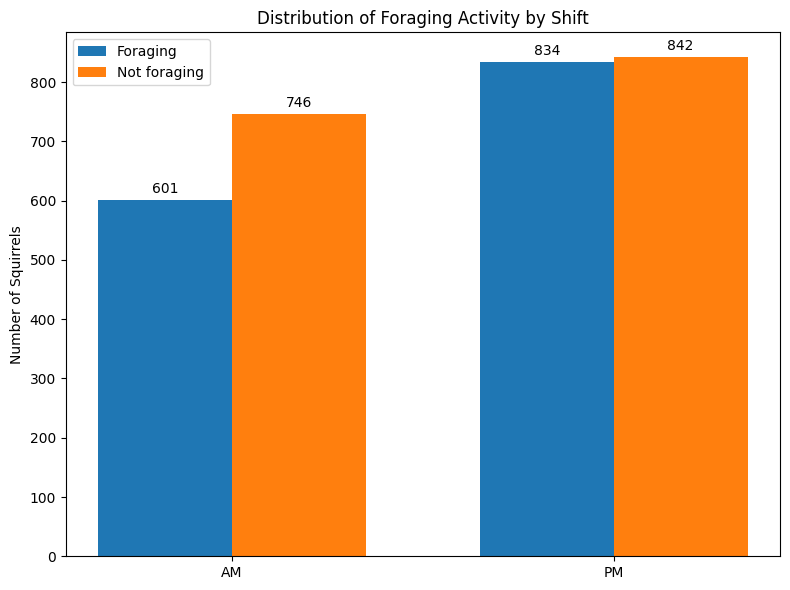

In [69]:
#disribution of eating activity by shift grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts of True and False for 'Eating' for each shift
chasing_counts = squirrel_df.groupby('Shift')['Foraging'].value_counts().unstack().fillna(0)

categories = chasing_counts.index.tolist()
group_5_values = chasing_counts[True].tolist() # Counts where Eating is True
group_6_values = chasing_counts[False].tolist() # Counts where Eating is False


bar_width = 0.35  # Increased bar width for better visualization
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6)) # Adjusted figure size

# Plotting each group with an offset
rects1 = ax.bar(x - bar_width/2, group_5_values, bar_width, label='Foraging')
rects2 = ax.bar(x + bar_width/2, group_6_values, bar_width, label='Not foraging')

ax.set_ylabel('Number of Squirrels')
ax.set_title('Distribution of Foraging Activity by Shift')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add counts on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.tight_layout()

plt.show()

In [70]:
'''
Null Hypothesis: There is no statistically significant difference in the climbing activity between the AM and PM shifts in the NYC squirrel population.
Alternative Hypothesis: Theres is a statistically significant difference in the climbing activity bteween the AM and PM SHifts in the NYC squirrel population.
'''
# Filter the 'Running' column based on the 'Shift' column
group_7 = squirrel_df[squirrel_df['Shift'] == 'AM']['Climbing']
group_8 = squirrel_df[squirrel_df['Shift'] == 'PM']['Climbing']

# Perform the independent samples t-test
t_stat, p_val = ttest_ind(group_7, group_8)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in climbing activity between AM and PM shifts.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in climbing activity between AM and PM shifts.")

T-statistic: 4.1610703986489215
P-value: 3.255964156180422e-05
Reject the null hypothesis: There is a statistically significant difference in climbing activity between AM and PM shifts.


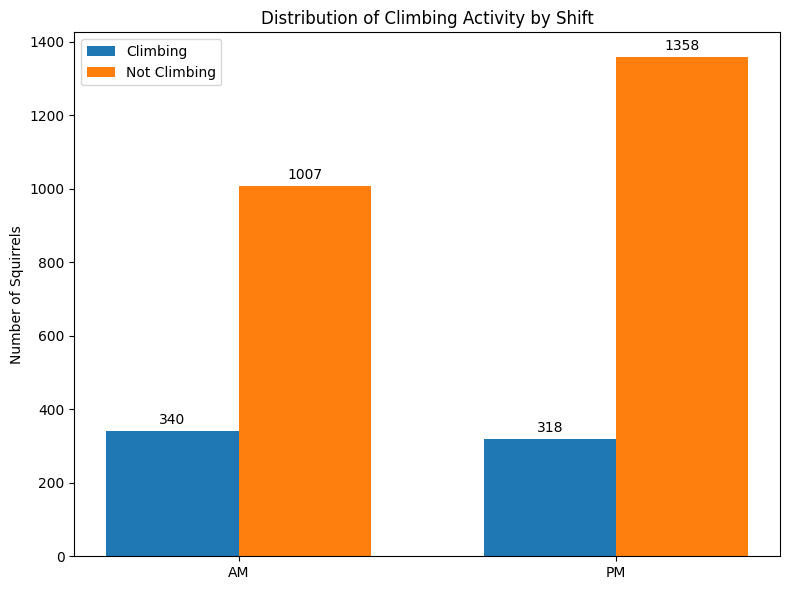

In [71]:
#disribution of eating activity by shift grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts of True and False for 'Eating' for each shift
climbing_counts = squirrel_df.groupby('Shift')['Climbing'].value_counts().unstack().fillna(0)

categories = climbing_counts.index.tolist()
group_3_values = climbing_counts[True].tolist() # Counts where Eating is True
group_4_values = climbing_counts[False].tolist() # Counts where Eating is False


bar_width = 0.35  # Increased bar width for better visualization
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6)) # Adjusted figure size

# Plotting each group with an offset
rects1 = ax.bar(x - bar_width/2, group_3_values, bar_width, label='Climbing')
rects2 = ax.bar(x + bar_width/2, group_4_values, bar_width, label='Not Climbing')

ax.set_ylabel('Number of Squirrels')
ax.set_title('Distribution of Climbing Activity by Shift')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add counts on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.tight_layout()

plt.show()

In [72]:
'''
Null Hypothesis: There is no statistically significant difference in the eating activity between the AM and PM shifts in the NYC squirrel population.
Alternative Hypothesis: Theres is a statistically significant difference in the eating activity bteween the AM and PM SHifts in the NYC squirrel population.
'''
# Filter the 'Running' column based on the 'Shift' column
group_9 = squirrel_df[squirrel_df['Shift'] == 'AM']['Eating']
group_10 = squirrel_df[squirrel_df['Shift'] == 'PM']['Eating']

# Perform the independent samples t-test
t_stat, p_val = ttest_ind(group_9, group_10)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in eating activity between AM and PM shifts.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in eating activity between AM and PM shifts.")

T-statistic: -3.603547262116158
P-value: 0.0003189693226813393
Reject the null hypothesis: There is a statistically significant difference in eating activity between AM and PM shifts.


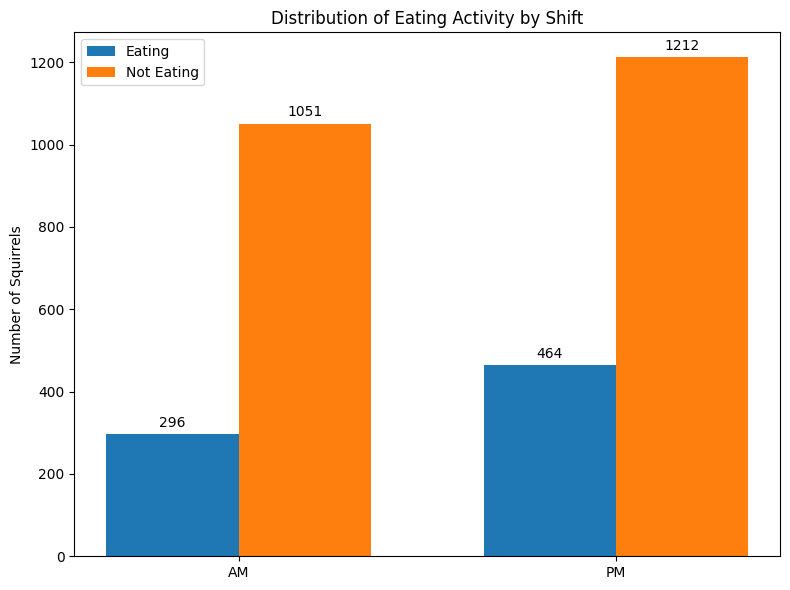

In [73]:
#disribution of eating activity by shift grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts of True and False for 'Eating' for each shift
eating_counts = squirrel_df.groupby('Shift')['Eating'].value_counts().unstack().fillna(0)

categories = eating_counts.index.tolist()
group_1_values = eating_counts[True].tolist() # Counts where Eating is True
group_2_values = eating_counts[False].tolist() # Counts where Eating is False


bar_width = 0.35  # Increased bar width for better visualization
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6)) # Adjusted figure size

# Plotting each group with an offset
rects1 = ax.bar(x - bar_width/2, group_1_values, bar_width, label='Eating')
rects2 = ax.bar(x + bar_width/2, group_2_values, bar_width, label='Not Eating')

ax.set_ylabel('Number of Squirrels')
ax.set_title('Distribution of Eating Activity by Shift')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add counts on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.tight_layout()

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


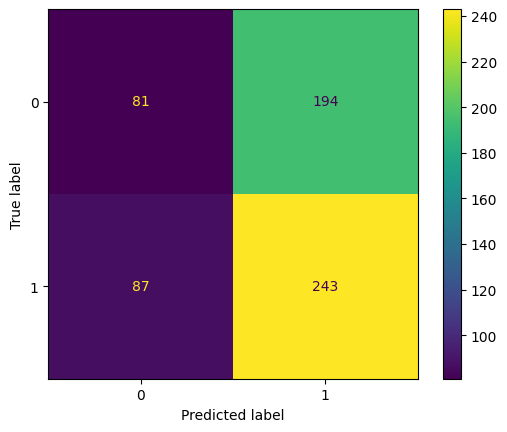

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

encoded_df = pd.get_dummies(squirrel_df, columns=['Location'], dtype=int)

#print(encoded_df)

inputs = squirrel_df[['Eating','Foraging','Climbing']]
output = squirrel_df[['Shift']]
# Encode the string labels in the output variable to numbers
label_encoder = LabelEncoder()
encoded_output = label_encoder.fit_transform(output)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, encoded_output, test_size=0.2, random_state=42)

# Initialize a KNN Classifier, setting k (here, k = 5)
model_classifier = KNeighborsClassifier(n_neighbors=3)

# Train your model on the training dataset
model_classifier.fit(X_train, y_train)

# Use your trained model to make predictions from the test data inputs
predictions_classifier = model_classifier.predict(X_test)


# Determine the accuracy of your model on the test data
accuracy_classifier = metrics.accuracy_score(y_test, predictions_classifier)

# Display the confusion matrix based on the test data for your model after fitting on the training data
cm = confusion_matrix(y_test, predictions_classifier, labels=model_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_classifier.classes_)
disp.plot()
plt.show()


# New Section

In [75]:
# categorical features to use in a classification problem is to use the Chi-Squared test to evaluate the independence between each feature and the target variable, selecting the top features based on their Chi-Squared scores

dropped_squirrel_df = squirrel_df[['Location', 'Foraging', 'Climbing', 'Eating', 'Primary Fur Color', 'Shift','Running','Chasing']].dropna()

# One-hot encode categorical features
df_encoded = pd.get_dummies(dropped_squirrel_df, columns=['Location','Primary Fur Color', 'Shift'], drop_first=True)

# Separate features and target
X = df_encoded.drop('Shift_PM', axis = 1)
y = df_encoded['Shift_PM']

# Apply Chi-Squared feature selection
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support(indices=True)]
discarded_features = X.columns[~selector.get_support(indices=True)]

print("2. Chi-Squared Test for Feature Selection:")
print('Selected Features:', selected_features)
print('Discarded Features:', discarded_features)

2. Chi-Squared Test for Feature Selection:
Selected Features: Index(['Foraging', 'Climbing', 'Eating', 'Location_Ground Plane',
       'Location_Unknown'],
      dtype='object')
Discarded Features: Index(['Primary Fur Color_Unknown', 'Primary Fur Color_Gray',
       'Primary Fur Color_Cinnamon', 'Chasing', 'Running'],
      dtype='object')


In [76]:
import pandas as pd
import numpy as np
from scipy import stats
squirrel_df['Activity'] = squirrel_df[['Eating', 'Foraging', 'Climbing','Running','Chasing']].sum(axis=1)

# Separate the data into two groups based on the 'Shift' column.
am_activity = squirrel_df[squirrel_df['Shift'] == 'AM']['Activity']
pm_activity = squirrel_df[squirrel_df['Shift'] == 'PM']['Activity']

#Perform the two-sample independent t-test.
# We set equal_var=False because it's safer and more robust,
t_stat, p_value = stats.ttest_ind(am_activity, pm_activity, equal_var=False)

#Interpret the results.
alpha = 0.05

print(f"Mean AM Activity: {am_activity.mean():.4f}")
print(f"Mean PM Activity: {pm_activity.mean():.4f}")
print("-" * 30)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("-" * 30)

if p_value < alpha:
    print("Conclusion: We reject the null hypothesis.")
    print("There is a statistically significant difference in average activity between the AM and PM shifts.")
else:
    print("Conclusion: We fail to reject the null hypothesis.")
    print("There is no statistically significant difference in average activity between the AM and PM shifts.")


Mean AM Activity: 1.2584
Mean PM Activity: 1.2930
------------------------------
T-statistic: -1.3935
P-value: 0.1636
------------------------------
Conclusion: We fail to reject the null hypothesis.
There is no statistically significant difference in average activity between the AM and PM shifts.
